In [1]:
#task:

#1. In-depth analysis of David Warner's performance

#2. Score distribution for teams by Innings

#3. Batsman comparison

In [105]:
#4. Top 10 batsman? ...  by using   .sort_values(ascending=False)[:10].plot.bar

#5. Top individual scores batsman? ... by using    .sort_values('column', ascending=False).head(10)

# 6. Highest wicket taker? ... by using    .isin()    ....    df['column'].value_counts()[:10].plot.bar()

In [2]:
import seaborn as sns # to make colorful graphs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# df is 2 dimensional data structure that has rows and columns

# in df, index starts from 0 (in excel, index starts from 1)

df= pd.read_csv('C:\datascience\DataScience05/deliveries.csv')

In [4]:
df.head(5)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [5]:
# make a filter that only shows df['batsman'] == 'DA Warner'

filter= df['batsman']=='DA Warner'

# pass the filter in your dataframd

df_warner= df[filter]
df_warner.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [6]:
df_warner.shape

(2902, 21)

In [7]:
df_warner['dismissal_kind'].value_counts()

caught               62
bowled               21
run out               8
lbw                   4
stumped               4
caught and bowled     2
hit wicket            1
Name: dismissal_kind, dtype: int64

<AxesSubplot:ylabel='dismissal_kind'>

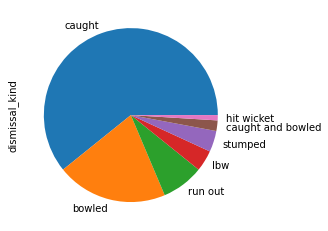

In [8]:
df_warner['dismissal_kind'].value_counts().plot.pie()

In [9]:
df_warner['batsman_runs'].unique()

array([0, 4, 6, 1, 2, 3], dtype=int64)

In [10]:
# see the structure of the code, this is important

len (df_warner[df_warner['batsman_runs']==4])

401

In [11]:
len (df_warner[ df_warner['batsman_runs']==6])

160

In [12]:
len( df_warner[ df_warner['batsman_runs']==1])

997

In [13]:
len (df_warner[ df_warner['batsman_runs']==2])

207

In [14]:
len (df_warner[ df_warner['batsman_runs']==3])

13

In [15]:
def count(df_warner, runs):
    return len (df_warner[ df_warner['batsman_runs']==runs])*runs

In [16]:
count(df_warner, 1)

997

In [17]:
count(df_warner, 2)

414

In [18]:
count(df_warner, 6)

960

In [19]:
count(df_warner, 4)

1604

In [20]:
count(df_warner, 3)

39

([<matplotlib.patches.Wedge at 0x1fa63593be0>,
 [Text(0.7817643705069365, 0.7738504177203069, '1'),
  Text(-0.33959111687520577, 1.0462685474291247, '2'),
  Text(-0.6816960876596443, 0.863302058418451, '3'),
  Text(-1.2983035479440677, -0.523839572193478, '4'),
  Text(0.8038429148449225, -0.750890516822272, '6')],
 [Text(0.4264169293674199, 0.4221002278474401, '24.8%'),
  Text(-0.18523151829556675, 0.5706919349613407, '10.3%'),
  Text(-0.3718342296325332, 0.4708920318646096, '1.0%'),
  Text(-0.8346237093926149, -0.3367540106958073, '40.0%'),
  Text(0.4384597717335941, -0.4095766455394211, '23.9%')])

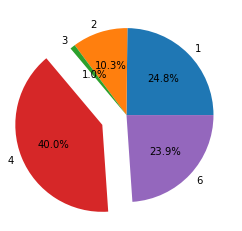

In [21]:
# autopct will convert to %

slices= [997, 414, 39, 1604, 960]
labels= [1,2,3,4,6]
explode=[0,0,0,0.3,0]
plt.pie(slices, labels= labels, autopct='%1.1f%%',  explode=explode)

In [22]:
df['bowling_team'].unique()

array(['Royal Challengers Bangalore', 'Sunrisers Hyderabad',
       'Rising Pune Supergiant', 'Mumbai Indians',
       'Kolkata Knight Riders', 'Gujarat Lions', 'Kings XI Punjab',
       'Delhi Daredevils', 'Chennai Super Kings', 'Rajasthan Royals',
       'Deccan Chargers', 'Kochi Tuskers Kerala', 'Pune Warriors',
       'Rising Pune Supergiants'], dtype=object)

In [23]:
# let's create an abbreviation for each team name

# create dictionary and map the dictionary to your dataframe

teams={'Royal Challengers Bangalore':'RCB', 'Sunrisers Hyderabad':'SH',
       'Rising Pune Supergiant':'RPS', 'Mumbai Indians':'MI',
       'Kolkata Knight Riders':'KKR', 'Gujarat Lions': 'GL', 'Kings XI Punjab': 'KXP',
       'Delhi Daredevils': 'DD', 'Chennai Super Kings': 'CSK', 'Rajasthan Royals': 'RR',
       'Deccan Chargers': 'DC', 'Kochi Tuskers Kerala': 'KTK', 'Pune Warriors': 'PW',
       'Rising Pune Supergiants': 'RPS'}

In [24]:
df['bowling_team']= df['bowling_team'].map(teams)

In [25]:
df['batting_team']= df['batting_team'].map(teams)

In [26]:
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,SH,RCB,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,SH,RCB,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,SH,RCB,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,SH,RCB,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,SH,RCB,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [27]:
df.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [28]:
# do .grouopby based on 3 columns, and find 'total_runs'

# do .sum() on 'total_tuns'

df.groupby(['match_id', 'inning', 'batting_team'])['total_runs'].sum()

match_id  inning  batting_team
1         1       SH              207
          2       RCB             172
2         1       MI              184
          2       RPS             187
3         1       GL              183
                                 ... 
634       2       KKR             140
635       1       GL              162
          2       SH              163
636       1       SH              208
          2       RCB             200
Name: total_runs, Length: 1284, dtype: int64

In [29]:
# if you want to convert this to dataframe, do... reset_index()

runs=  df.groupby(['match_id', 'inning', 'batting_team'])['total_runs'].sum().reset_index()
runs

,match_id,inning,batting_team,total_runs
0,1,1,SH,207
1,1,2,RCB,172
2,2,1,MI,184
3,2,2,RPS,187
4,3,1,GL,183
...,...,...,...,...
1279,634,2,KKR,140
1280,635,1,GL,162
1281,635,2,SH,163
1282,636,1,SH,208


In [30]:
runs.drop('match_id', axis=1, inplace=True)
runs.head()

,inning,batting_team,total_runs
0,1,SH,207
1,2,RCB,172
2,1,MI,184
3,2,RPS,187
4,1,GL,183


In [31]:
inning1= runs[ runs['inning']==1]
inning2= runs[ runs['inning']==2]

<AxesSubplot:xlabel='batting_team', ylabel='total_runs'>

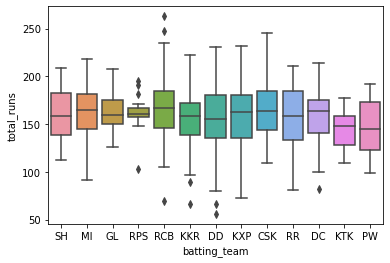

In [32]:
sns.boxplot(x='batting_team', y='total_runs',  data=inning1)

<AxesSubplot:xlabel='batting_team', ylabel='total_runs'>

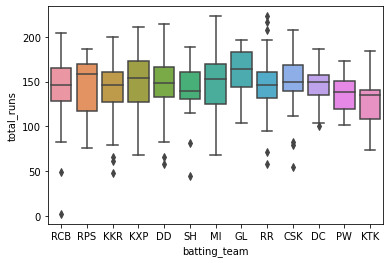

In [33]:
sns.boxplot(x='batting_team', y='total_runs', data=inning2)


In [34]:
runs2= df.groupby(['match_id', 'inning', 'bowling_team'])['total_runs'].sum().reset_index()
runs2

,match_id,inning,bowling_team,total_runs
0,1,1,RCB,207
1,1,2,SH,172
2,2,1,RPS,184
3,2,2,MI,187
4,3,1,KKR,183
...,...,...,...,...
1279,634,2,SH,140
1280,635,1,SH,162
1281,635,2,GL,163
1282,636,1,RCB,208


In [35]:
runs2.drop('match_id', axis=1, inplace=True)
runs2

,inning,bowling_team,total_runs
0,1,RCB,207
1,2,SH,172
2,1,RPS,184
3,2,MI,187
4,1,KKR,183
...,...,...,...
1279,2,SH,140
1280,1,SH,162
1281,2,GL,163
1282,1,RCB,208


In [36]:
# why doesn't it work when I do sns.boxplot for below codes??

inning3= [runs2 [runs2['inning']==1]]
inning4= [runs2 [runs2['inning']==2]]

In [37]:
# how many times teams score more than 200?

runs3= df.groupby(['match_id', 'inning', 'batting_team','bowling_team'])['total_runs'].sum().reset_index()
runs3

,match_id,inning,batting_team,bowling_team,total_runs
0,1,1,SH,RCB,207
1,1,2,RCB,SH,172
2,2,1,MI,RPS,184
3,2,2,RPS,MI,187
4,3,1,GL,KKR,183
...,...,...,...,...,...
1279,634,2,KKR,SH,140
1280,635,1,GL,SH,162
1281,635,2,SH,GL,163
1282,636,1,SH,RCB,208


In [38]:
score200= runs3[ runs3['total_runs']>=200]
score200

,match_id,inning,batting_team,bowling_team,total_runs
0,1,1,SH,RCB,207
16,9,1,DD,RPS,205
38,20,1,RCB,GL,213
62,32,1,SH,KXP,207
72,36,1,SH,KKR,209
...,...,...,...,...,...
1250,620,1,RCB,GL,248
1256,623,1,MI,DD,206
1262,626,1,RCB,KXP,211
1282,636,1,SH,RCB,208


C:\Users\Kate\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='batting_team', ylabel='count'>

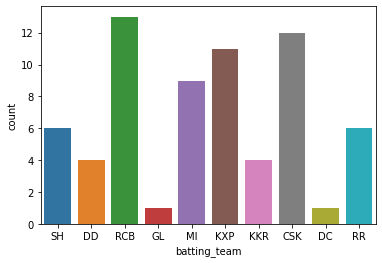

In [39]:
sns.countplot(score200['batting_team'])

C:\Users\Kate\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bowling_team', ylabel='count'>

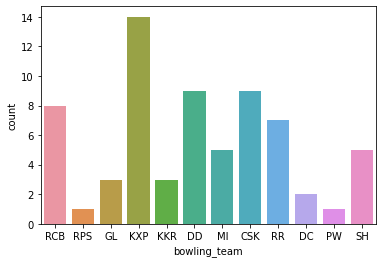

In [40]:
sns.countplot(score200['bowling_team'])

In [41]:
#3. Batsman performance

In [42]:
balls= df.groupby('batsman')['ball'].count().reset_index()
balls

,batsman,ball
0,A Ashish Reddy,196
1,A Chandila,7
2,A Chopra,75
3,A Choudhary,20
4,A Flintoff,57
...,...,...
456,YV Takawale,183
457,Yashpal Singh,67
458,Younis Khan,7
459,Yuvraj Singh,2050


In [43]:
batsmanruns= df.groupby('batsman')['batsman_runs'].sum().reset_index()
batsmanruns

,batsman,batsman_runs
0,A Ashish Reddy,280
1,A Chandila,4
2,A Chopra,53
3,A Choudhary,25
4,A Flintoff,62
...,...,...
456,YV Takawale,192
457,Yashpal Singh,47
458,Younis Khan,3
459,Yuvraj Singh,2591


In [44]:
four= df [df['batsman_runs']==4]
four

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
2,1,1,SH,RCB,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
8,1,1,SH,RCB,2,2,DA Warner,S Dhawan,A Choudhary,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
13,1,1,SH,RCB,2,7,MC Henriques,S Dhawan,A Choudhary,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
30,1,1,SH,RCB,5,5,MC Henriques,S Dhawan,S Aravind,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
32,1,1,SH,RCB,6,1,S Dhawan,MC Henriques,SR Watson,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150403,636,2,RCB,SH,11,4,V Kohli,AB de Villiers,BCJ Cutting,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
150407,636,2,RCB,SH,12,2,V Kohli,AB de Villiers,Bipul Sharma,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
150418,636,2,RCB,SH,14,1,KL Rahul,AB de Villiers,Bipul Sharma,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
150447,636,2,RCB,SH,18,6,Sachin Baby,STR Binny,B Kumar,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [45]:
runs_four= four.groupby('batsman')['batsman_runs'].count().reset_index()
runs_four

,batsman,batsman_runs
0,A Ashish Reddy,16
1,A Chopra,7
2,A Choudhary,1
3,A Flintoff,5
4,A Kumble,3
...,...,...
363,YK Pathan,240
364,YV Takawale,26
365,Yashpal Singh,5
366,Yuvraj Singh,205


In [46]:
runs_four.columns=['batsman', '4s']
runs_four

,batsman,4s
0,A Ashish Reddy,16
1,A Chopra,7
2,A Choudhary,1
3,A Flintoff,5
4,A Kumble,3
...,...,...
363,YK Pathan,240
364,YV Takawale,26
365,Yashpal Singh,5
366,Yuvraj Singh,205


In [47]:
six= df [df['batsman_runs']==6]
six

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
10,1,1,SH,RCB,2,4,DA Warner,S Dhawan,A Choudhary,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
47,1,1,SH,RCB,8,4,MC Henriques,S Dhawan,TM Head,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
75,1,1,SH,RCB,13,2,Yuvraj Singh,MC Henriques,A Choudhary,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
89,1,1,SH,RCB,15,3,Yuvraj Singh,MC Henriques,S Aravind,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
91,1,1,SH,RCB,15,5,MC Henriques,Yuvraj Singh,S Aravind,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150395,636,2,RCB,SH,10,2,V Kohli,CH Gayle,Mustafizur Rahman,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
150413,636,2,RCB,SH,13,2,V Kohli,AB de Villiers,BB Sran,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
150428,636,2,RCB,SH,15,5,SR Watson,KL Rahul,MC Henriques,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
150440,636,2,RCB,SH,17,5,STR Binny,Sachin Baby,Mustafizur Rahman,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN


In [48]:
runs_six= six.groupby('batsman')['batsman_runs'].count().reset_index()
runs_six
runs_six.columns=['batsman', '6s']
runs_six

,batsman,6s
0,A Ashish Reddy,15
1,A Choudhary,1
2,A Flintoff,2
3,A Mishra,5
4,A Mithun,1
...,...,...
296,Y Venugopal Rao,37
297,YK Pathan,149
298,YV Takawale,3
299,Yuvraj Singh,141


In [49]:
player= pd.concat([runs, balls.iloc[:,1], runs_four.iloc[:,1], runs_six.iloc[:,1]], axis=1)
player

,inning,batting_team,total_runs,ball,4s,6s
0,1,SH,207,196.0,16.0,15.0
1,2,RCB,172,7.0,7.0,1.0
2,1,MI,184,75.0,1.0,2.0
3,2,RPS,187,20.0,5.0,5.0
4,1,GL,183,57.0,3.0,1.0
...,...,...,...,...,...,...
1279,2,KKR,140,NaN,NaN,NaN
1280,1,GL,162,NaN,NaN,NaN
1281,2,SH,163,NaN,NaN,NaN
1282,1,SH,208,NaN,NaN,NaN


In [50]:
player.fillna(0, inplace=True)
player

,inning,batting_team,total_runs,ball,4s,6s
0,1,SH,207,196.0,16.0,15.0
1,2,RCB,172,7.0,7.0,1.0
2,1,MI,184,75.0,1.0,2.0
3,2,RPS,187,20.0,5.0,5.0
4,1,GL,183,57.0,3.0,1.0
...,...,...,...,...,...,...
1279,2,KKR,140,0.0,0.0,0.0
1280,1,GL,162,0.0,0.0,0.0
1281,2,SH,163,0.0,0.0,0.0
1282,1,SH,208,0.0,0.0,0.0


In [60]:
# calculate strike rate, which is (total_runs/ ball) *100

player ['strike_rate']= (player['total_runs']/ player['ball']) *100
player.sort_values('strike_rate', ascending=False)

,inning,batting_team,total_runs,ball,4s,6s,strike_rate
642,2,RR,170,0.0,0.0,0.0,inf
963,1,SH,172,0.0,0.0,0.0,inf
861,1,RR,132,0.0,0.0,0.0,inf
860,2,PW,170,0.0,0.0,0.0,inf
859,1,RCB,187,0.0,0.0,0.0,inf
...,...,...,...,...,...,...,...
431,2,DD,167,3494.0,0.0,0.0,4.779622
85,2,RCB,119,2532.0,23.0,2.0,4.699842
323,2,MI,143,3274.0,112.0,0.0,4.367746
340,1,CSK,116,2960.0,9.0,0.0,3.918919


In [58]:
player ['strike_rate'].max()

inf

In [61]:
# to get score of each and every batsman...

group= df.groupby(['match_id', 'batsman', 'batting_team'])['batsman_runs'].sum().reset_index()
group

,match_id,batsman,batting_team,batsman_runs
0,1,A Choudhary,RCB,6
1,1,BCJ Cutting,SH,16
2,1,CH Gayle,RCB,32
3,1,DA Warner,SH,14
4,1,DJ Hooda,SH,16
...,...,...,...,...
9510,636,SR Watson,RCB,11
9511,636,STR Binny,RCB,9
9512,636,Sachin Baby,RCB,18
9513,636,V Kohli,RCB,54


In [64]:
# to find the maximum score for each of the batsman...

max_score = group.groupby('batsman')['batsman_runs'].max().reset_index()

max_score.columns=['batsman', 'max score']
max_score

,batsman,max score
0,A Ashish Reddy,36
1,A Chandila,4
2,A Chopra,24
3,A Choudhary,15
4,A Flintoff,24
...,...,...
456,YV Takawale,45
457,Yashpal Singh,20
458,Younis Khan,3
459,Yuvraj Singh,83


In [66]:
player2= pd.concat([player, max_score.iloc[:, 1]], axis=1)
player2

,inning,batting_team,total_runs,ball,4s,6s,strike_rate,max score
0,1,SH,207,196.0,16.0,15.0,105.612245,36.0
1,2,RCB,172,7.0,7.0,1.0,2457.142857,4.0
2,1,MI,184,75.0,1.0,2.0,245.333333,24.0
3,2,RPS,187,20.0,5.0,5.0,935.000000,15.0
4,1,GL,183,57.0,3.0,1.0,321.052632,24.0
...,...,...,...,...,...,...,...,...
1279,2,KKR,140,0.0,0.0,0.0,inf,NaN
1280,1,GL,162,0.0,0.0,0.0,inf,NaN
1281,2,SH,163,0.0,0.0,0.0,inf,NaN
1282,1,SH,208,0.0,0.0,0.0,inf,NaN


In [ ]:
#4. Top 10 batsman?


In [91]:
max_runs= df.groupby('batsman')['batsman_runs'].sum()
max_runs

batsman
A Ashish Reddy     280
A Chandila           4
A Chopra            53
A Choudhary         25
A Flintoff          62
                  ... 
YV Takawale        192
Yashpal Singh       47
Younis Khan          3
Yuvraj Singh      2591
Z Khan             117
Name: batsman_runs, Length: 461, dtype: int64

<AxesSubplot:xlabel='batsman'>

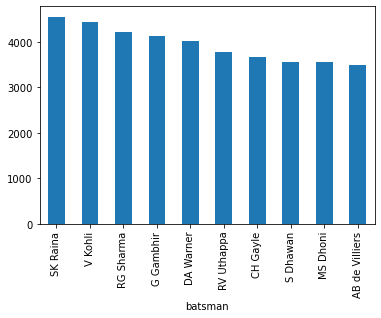

In [92]:
max_runs.sort_values(ascending=False)[:10].plot.bar()

In [ ]:
#5. Top individual scores batsman?


In [93]:
# bring up your previous code again, for dataframe name 'group'
# do .sort_values(by= 'which column you want to focus on sorting', ascending=False)

df.groupby(['match_id', 'batsman', 'batting_team'])['batsman_runs'].sum().reset_index().sort_values(by='batsman_runs', ascending=False)

,match_id,batsman,batting_team,batsman_runs
6200,411,CH Gayle,RCB,175
900,60,BB McCullum,KKR,158
8426,562,AB de Villiers,RCB,133
9257,620,AB de Villiers,RCB,129
5585,372,CH Gayle,RCB,128
...,...,...,...,...
5209,346,RE Levi,MI,0
5201,346,CL White,DC,0
7169,476,PP Chawla,KKR,0
540,37,AF Milne,RCB,0


In [95]:
# top 10 batsman

# simply do .head(10)

df.groupby(['match_id', 'batsman', 'batting_team'])['batsman_runs'].sum().reset_index().sort_values(by='batsman_runs', ascending=False).head(10)

,match_id,batsman,batting_team,batsman_runs
6200,411,CH Gayle,RCB,175
900,60,BB McCullum,KKR,158
8426,562,AB de Villiers,RCB,133
9257,620,AB de Villiers,RCB,129
5585,372,CH Gayle,RCB,128
3135,206,M Vijay,CSK,127
529,36,DA Warner,SH,126
7752,516,V Sehwag,KXP,122
3686,243,PC Valthaty,KXP,120
4223,279,V Sehwag,DD,119


In [ ]:
# 6. Highest wicket taker?


In [96]:
df['dismissal_kind'].unique()

array([nan, 'caught', 'bowled', 'run out', 'lbw', 'caught and bowled',
       'stumped', 'retired hurt', 'hit wicket', 'obstructing the field'],
      dtype=object)

In [98]:
dismissal_kinds=['caught', 'bowled', 'lbw', 'caught and bowled',
       'stumped', 'hit wicket']

In [99]:
# .isin() 

hwt= df[ df['dismissal_kind'].isin(dismissal_kinds)]
hwt

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
11,1,1,SH,RCB,2,5,DA Warner,S Dhawan,A Choudhary,0,...,0,0,0,0,0,0,0,DA Warner,caught,Mandeep Singh
64,1,1,SH,RCB,11,3,S Dhawan,MC Henriques,STR Binny,0,...,0,0,0,0,0,0,0,S Dhawan,caught,Sachin Baby
94,1,1,SH,RCB,16,2,MC Henriques,Yuvraj Singh,YS Chahal,0,...,0,0,0,0,0,0,0,MC Henriques,caught,Sachin Baby
116,1,1,SH,RCB,19,4,Yuvraj Singh,DJ Hooda,TS Mills,0,...,0,0,0,0,0,0,0,Yuvraj Singh,bowled,NaN
160,1,2,RCB,SH,6,4,Mandeep Singh,CH Gayle,Rashid Khan,0,...,0,0,0,0,0,0,0,Mandeep Singh,bowled,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150402,636,2,RCB,SH,11,3,CH Gayle,V Kohli,BCJ Cutting,0,...,0,0,0,0,0,0,0,CH Gayle,caught,Bipul Sharma
150416,636,2,RCB,SH,13,5,V Kohli,AB de Villiers,BB Sran,0,...,0,0,0,0,0,0,0,V Kohli,bowled,NaN
150422,636,2,RCB,SH,14,5,AB de Villiers,KL Rahul,Bipul Sharma,0,...,0,0,0,0,0,0,0,AB de Villiers,caught,MC Henriques
150432,636,2,RCB,SH,16,3,KL Rahul,SR Watson,BCJ Cutting,0,...,0,0,0,0,0,0,0,KL Rahul,bowled,NaN


<AxesSubplot:>

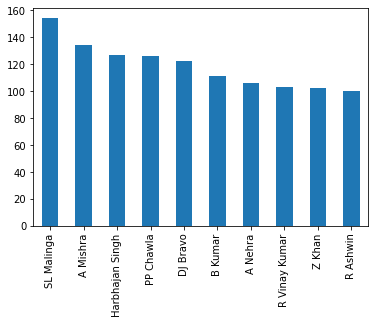

In [104]:
# [:10] gives me top 10

# .plot(kind='bar')

hwt['bowler'].value_counts()[:10].plot.bar()